In [547]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import sklearn.metrics as sm
%matplotlib inline

#### Loading IRIS Dataset

In [548]:
iris = datasets.load_iris()

#### Dataframe for comparison of alogrithms 

In [549]:
output = pd.DataFrame(index=['K-Means','K-Medoids','AGNES - Wand','AGNES - Single', 'AGNES - Average', 'AGNES - Complete',
                            'BIRCH', 'DBSCAN', 'Log. Regression', 'Affinity Propogation', 'Mean Shift' ],
                      columns=['ARI','MI','HCV','FM','SC','CH','DB'])

In [550]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

# Dataset Visualization

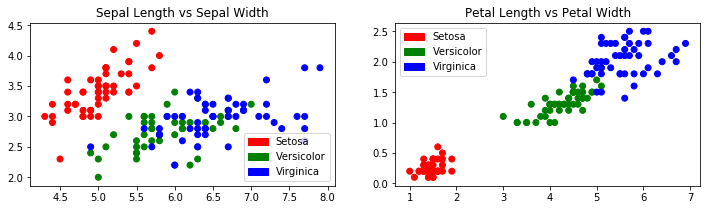

In [551]:
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])
iris_targets_legend = np.array(iris.target_names)
red_patch = mpatches.Patch(color='red', label='Setosa')
green_patch = mpatches.Patch(color='green', label='Versicolor')
blue_patch = mpatches.Patch(color='blue', label='Virginica')


plt.subplot(1, 2, 1)
plt.scatter(x['Sepal Length'], x['Sepal Width'], c=colors[y['Target']])
plt.title('Sepal Length vs Sepal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1,2,2)
plt.scatter(x['Petal Length'], x['Petal Width'], c= colors[y['Target']])
plt.title('Petal Length vs Petal Width')
plt.legend(handles=[red_patch, green_patch, blue_patch])

# Partitioning Approach

### 1. K-Means Clustering

In [552]:
iris_k_mean_model = KMeans(n_clusters=3)
iris_k_mean_model.fit(x)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

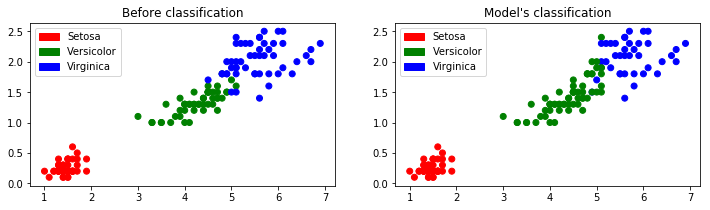

In [553]:
plt.figure(figsize=(12,3))

colors = np.array(['red', 'green', 'blue'])

predicted_k_mean_Y = np.choose(iris_k_mean_model.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']])
plt.title('Before classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predicted_k_mean_Y])
plt.title("Model's classification")
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [554]:
#sm.accuracy_score(predicted_k_mean_Y, y['Target'])

In [555]:
output.loc['K-Means','ARI'] = metrics.adjusted_rand_score(iris.target, iris_k_mean_model.labels_)
output.loc['K-Means','MI'] = metrics.adjusted_mutual_info_score(iris.target, iris_k_mean_model.labels_)
output.loc['K-Means','HCV'] = metrics.homogeneity_score(iris.target, iris_k_mean_model.labels_)
output.loc['K-Means','FM'] = metrics.fowlkes_mallows_score(iris.target, iris_k_mean_model.labels_)
output.loc['K-Means','SC'] = metrics.silhouette_score(iris.data, iris_k_mean_model.labels_, metric='euclidean')
output.loc['K-Means','CH'] = metrics.calinski_harabaz_score(iris.data, iris_k_mean_model.labels_)
output.loc['K-Means','DB'] = metrics.davies_bouldin_score(iris.data, iris_k_mean_model.labels_)

### 2. K-Medoids

In [556]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

In [557]:
from sklearn_extra.cluster import KMedoids

iris_k_medoid_model = KMedoids(n_clusters=3, random_state=0).fit(x)

# print('Centers found by scikit-learn extra:')
# print(iris_k_medoid_model.cluster_centers_)
pred_label = iris_k_medoid_model.predict(x)

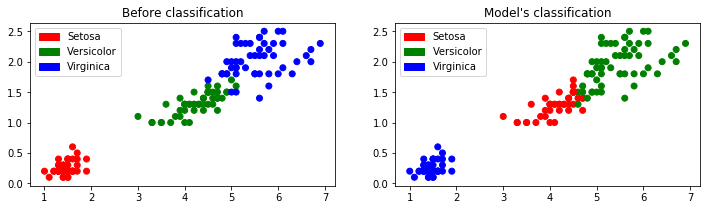

In [558]:
plt.figure(figsize=(12,3))
colors = np.array(['red', 'green', 'blue'])

predicted_k_med_Y = np.choose(iris_k_medoid_model.labels_, [1, 0, 2]).astype(np.int64)

plt.subplot(1, 2, 1)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[y['Target']])
plt.title('Before classification')
plt.legend(handles=[red_patch, green_patch, blue_patch])

plt.subplot(1, 2, 2)
plt.scatter(x['Petal Length'], x['Petal Width'], c=colors[predicted_k_med_Y])
plt.title("Model's classification")
plt.legend(handles=[red_patch, green_patch, blue_patch])

In [559]:
#sm.accuracy_score(predicted_k_med_Y, y['Target'])

In [560]:
output.loc['K-Medoids','ARI'] = metrics.adjusted_rand_score(iris.target, iris_k_medoid_model.labels_)
output.loc['K-Medoids','MI'] = metrics.adjusted_mutual_info_score(iris.target, iris_k_medoid_model.labels_)
output.loc['K-Medoids','HCV'] = metrics.homogeneity_score(iris.target, iris_k_medoid_model.labels_)
output.loc['K-Medoids','FM'] = metrics.fowlkes_mallows_score(iris.target, iris_k_medoid_model.labels_)
output.loc['K-Medoids','SC'] = metrics.silhouette_score(iris.data, iris_k_medoid_model.labels_, metric='euclidean')
output.loc['K-Medoids','CH'] = metrics.calinski_harabaz_score(iris.data, iris_k_medoid_model.labels_)
output.loc['K-Medoids','DB'] = metrics.davies_bouldin_score(iris.data, iris_k_medoid_model.labels_)

### 3. K-Nearest Neighbour

In [561]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

In [562]:
from sklearn.model_selection import train_test_split
TX, VX, Ty, Vy = train_test_split(x, y, random_state = 0)

In [563]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(TX, Ty)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [564]:
pred_y = knc.predict(VX)

In [565]:
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(Vy, pred_y))

0.02631578947368421


In [566]:
#accuracy
print('Test score is: {:.2f}'.format(knc.score(VX,Vy)))

Test score is: 0.97


#### Visualization of Nearest Neighbours: we only take the first two features.

In [567]:
from matplotlib.colors import ListedColormap
from sklearn import neighbors
X = iris.data[:, :2]
y = iris.target

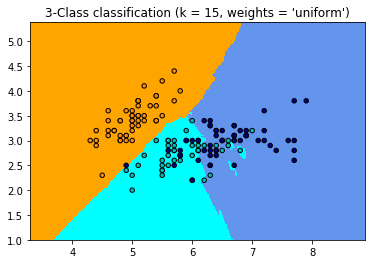

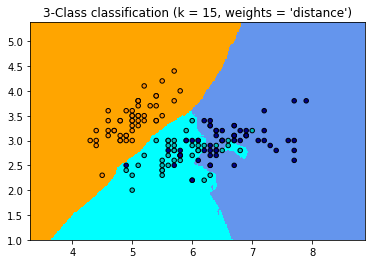

In [568]:
h = .02  # step size in the mesh
n_neighbors = 15
# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()

# Hierarchical approach

### 1. AGNES

In [569]:
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

In [570]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

# Hierarchical clustering
# Ward is the default linkage algorithm, so we'll start with that
ward = AgglomerativeClustering(n_clusters=3)
ward_pred = ward.fit_predict(x)

In [571]:
# Hierarchical clustering using complete linkage
complete = AgglomerativeClustering(n_clusters=3,linkage='complete')
complete_pred = complete.fit_predict(iris.data)

# Hierarchical clustering using average linkage
avg = AgglomerativeClustering(n_clusters=3,linkage='average')
avg_pred = avg.fit_predict(iris.data)

# Hierarchical clustering using complete linkage
single = AgglomerativeClustering(n_clusters=3,linkage='single')
single_pred = single.fit_predict(iris.data)

In [572]:
from sklearn.metrics import adjusted_rand_score

ward_ar_score = adjusted_rand_score(iris.target, ward_pred)

In [573]:
output.loc['AGNES - Wand','ARI'] = metrics.adjusted_rand_score(iris.target, ward_pred)
output.loc['AGNES - Wand','MI'] = metrics.adjusted_mutual_info_score(iris.target, ward_pred)
output.loc['AGNES - Wand','HCV'] = metrics.homogeneity_score(iris.target, ward_pred)
output.loc['AGNES - Wand','FM'] = metrics.fowlkes_mallows_score(iris.target, ward_pred)
output.loc['AGNES - Wand','SC'] = metrics.silhouette_score(iris.data, ward_pred, metric='euclidean')
output.loc['AGNES - Wand','CH'] = metrics.calinski_harabaz_score(iris.data, ward_pred)
output.loc['AGNES - Wand','DB'] = metrics.davies_bouldin_score(iris.data, ward_pred)


output.loc['AGNES - Single','ARI'] = metrics.adjusted_rand_score(iris.target, single_pred)
output.loc['AGNES - Single','MI'] = metrics.adjusted_mutual_info_score(iris.target, single_pred)
output.loc['AGNES - Single','HCV'] = metrics.homogeneity_score(iris.target, single_pred)
output.loc['AGNES - Single','FM'] = metrics.fowlkes_mallows_score(iris.target, single_pred)
output.loc['AGNES - Single','SC'] = metrics.silhouette_score(iris.data, single_pred, metric='euclidean')
output.loc['AGNES - Single','CH'] = metrics.calinski_harabaz_score(iris.data, single_pred)
output.loc['AGNES - Single','DB'] = metrics.davies_bouldin_score(iris.data, single_pred)

output.loc['AGNES - Average','ARI'] = metrics.adjusted_rand_score(iris.target, avg_pred)
output.loc['AGNES - Average','MI'] = metrics.adjusted_mutual_info_score(iris.target, avg_pred)
output.loc['AGNES - Average','HCV'] = metrics.homogeneity_score(iris.target, avg_pred)
output.loc['AGNES - Average','FM'] = metrics.fowlkes_mallows_score(iris.target, avg_pred)
output.loc['AGNES - Average','SC'] = metrics.silhouette_score(iris.data, avg_pred, metric='euclidean')
output.loc['AGNES - Average','CH'] = metrics.calinski_harabaz_score(iris.data, avg_pred)
output.loc['AGNES - Average','DB'] = metrics.davies_bouldin_score(iris.data, avg_pred)

output.loc['AGNES - Complete','ARI'] = metrics.adjusted_rand_score(iris.target, complete_pred)
output.loc['AGNES - Complete','MI'] = metrics.adjusted_mutual_info_score(iris.target, complete_pred)
output.loc['AGNES - Complete','HCV'] = metrics.homogeneity_score(iris.target, complete_pred)
output.loc['AGNES - Complete','FM'] = metrics.fowlkes_mallows_score(iris.target, complete_pred)
output.loc['AGNES - Complete','SC'] = metrics.silhouette_score(iris.data, complete_pred, metric='euclidean')
output.loc['AGNES - Complete','CH'] = metrics.calinski_harabaz_score(iris.data, complete_pred)
output.loc['AGNES - Complete','DB'] = metrics.davies_bouldin_score(iris.data, complete_pred)


In [574]:
# Import scipy's linkage function to conduct the clustering
from scipy.cluster.hierarchy import linkage

# Specify the linkage type. Scipy accepts 'ward', 'complete', 'average', as well as other values

# Pick the one that resulted in the highest Adjusted Rand Score
linkage_type = 'average'

linkage_matrix = linkage(x, linkage_type)

### Change linkage_type to any = [single, average, complete, ward]

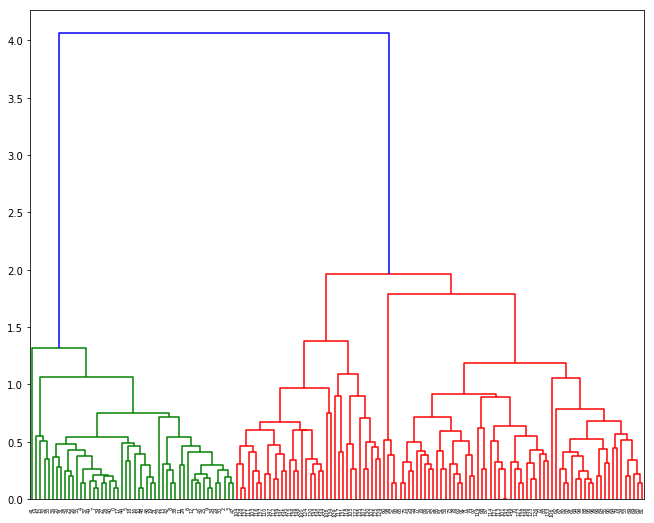

In [575]:
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
plt.figure(figsize=(11,9))

# plot using 'dendrogram()'
dendrogram(linkage_matrix)

plt.show()

# BIRCH

In [576]:
from sklearn.cluster import Birch

In [577]:
clust_model = Birch()

In [578]:
clust_model.fit(iris.data)

Birch(branching_factor=50, compute_labels=True, copy=True, n_clusters=3,
   threshold=0.5)

In [579]:
label_BIRCH = clust_model.labels_

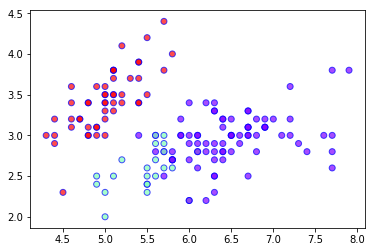

In [580]:
labels = clust_model.predict(iris.data)
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow', alpha=0.7, edgecolors='b')

In [581]:
n_clusters = np.unique(label_BIRCH).size
print("n_clusters : %d" % n_clusters)

n_clusters : 3


In [583]:
output.loc['BIRCH','ARI'] = metrics.adjusted_rand_score(iris.target, clust_model.labels_)
output.loc['BIRCH','MI'] = metrics.adjusted_mutual_info_score(iris.target, clust_model.labels_)
output.loc['BIRCH','HCV'] = metrics.homogeneity_score(iris.target, clust_model.labels_)
output.loc['BIRCH','FM'] = metrics.fowlkes_mallows_score(iris.target, clust_model.labels_)
output.loc['BIRCH','SC'] = metrics.silhouette_score(iris.data, clust_model.labels_, metric='euclidean')
output.loc['BIRCH','CH'] = metrics.calinski_harabaz_score(iris.data, clust_model.labels_)
output.loc['BIRCH','DB'] = metrics.davies_bouldin_score(iris.data, clust_model.labels_)

# Density Based Clustering Method
### 1. DBSCAN

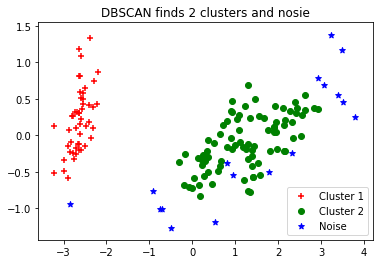

In [584]:
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
dbscan=DBSCAN()

#print(dbscan)

dbscan.fit(iris.data)

label_DBSCAN = dbscan.labels_
#print(dbscan.labels_)

pca=PCA(n_components=2).fit(iris.data)
pca_2d=pca.transform(iris.data)
for i in range(0, pca_2d.shape[0]):
    if dbscan.labels_[i] == 0:
        c1 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='r', marker='+')
    elif dbscan.labels_[i] == 1:
        c2 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='g', marker='o')
    elif dbscan.labels_[i] == -1:
        c3 = plt.scatter(pca_2d[i, 0], pca_2d[i, 1], c='b', marker='*')
plt.legend([c1, c2, c3], ['Cluster 1', 'Cluster 2', 'Noise'])
plt.title('DBSCAN finds 2 clusters and nosie')
plt.show()

#two clusters have been identified, 0 and 1, while outlier observations are labeled -1.

In [585]:
output.loc['DBSCAN','ARI'] = metrics.adjusted_rand_score(iris.target, label_DBSCAN)
output.loc['DBSCAN','MI'] = metrics.adjusted_mutual_info_score(iris.target, label_DBSCAN)
output.loc['DBSCAN','HCV'] = metrics.homogeneity_score(iris.target, label_DBSCAN)
output.loc['DBSCAN','FM'] = metrics.fowlkes_mallows_score(iris.target, label_DBSCAN)
output.loc['DBSCAN','SC'] = metrics.silhouette_score(iris.data, label_DBSCAN, metric='euclidean')
output.loc['DBSCAN','CH'] = metrics.calinski_harabaz_score(iris.data, label_DBSCAN)
output.loc['DBSCAN','DB'] = metrics.davies_bouldin_score(iris.data, label_DBSCAN)

# Model Based Approach
### 1. Self-Organizing-Maps

In [586]:
from minisom import MiniSom

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [587]:
data = np.genfromtxt('./data/iris.csv', delimiter=',', usecols=(0, 1, 2, 3))
# data normalization
data = np.apply_along_axis(lambda x: x/np.linalg.norm(x), 1, data)

# Initialization and training
som = MiniSom(7, 7, 4, sigma=1.0, learning_rate=0.5)
som.random_weights_init(data)
print("Training...")
som.train_random(data, 100)  # random training
print("\n...ready!")
data.shape

Training...

...ready!


(150, 4)

In [588]:
target = np.genfromtxt('./data/iris.csv', delimiter=',', usecols=(4), dtype=str)
t = np.zeros(len(target), dtype=int)
t[target == 'Iris-setosa'] = 0
t[target == 'Iris-versicolor'] = 1
t[target == 'Iris-virginica'] = 2

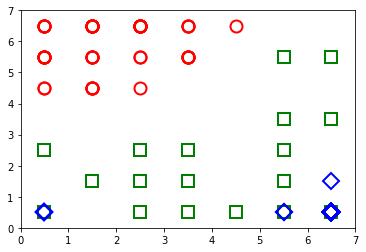

In [589]:
# use different colors and markers for each label
markers = ['o', 's', 'D']
colors = ['r', 'g', 'b'] # (red,iris-setosa),(green,iris-versicolor),(blue,iris-virginica)
for cnt, xx in enumerate(data):
    w = som.winner(xx)  # getting the winner
    # palce a marker on the winning position for the sample xx
    plt.plot(w[0]+.5, w[1]+.5, markers[t[cnt]], markerfacecolor='None',
             markeredgecolor=colors[t[cnt]], markersize=12, markeredgewidth=2)
    #print(t[cnt])
plt.axis([0, 7, 0, 7])

#colors = ('red' , 'green', 'blue')
#markers = ('Iris-setosa','Iris-versicolor','Iris-virginica')

#plt.legend(colors, markers)
plt.show()

# Logistic Regression

In [590]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()

In [591]:
X = iris.data
y = iris.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)#, random_state=44)
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [592]:
y_pred=clf.predict(X_test)

Text(0.5, 1.0, 'Logistic Regression')

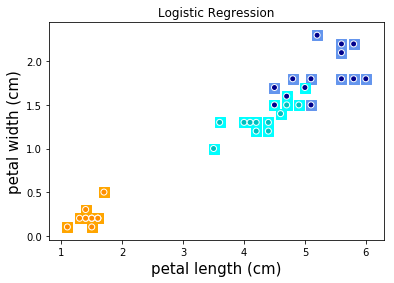

In [593]:
plt.scatter(X_test[:,index1], X_test[:, index2], c=y_test, cmap=cmap_light, marker='s', s=100)
plt.scatter(X_test[:,index1], X_test[:, index2], c=y_pred, cmap=cmap_bold, edgecolors='white')
plt.xlabel(iris.feature_names[index1], fontsize=15)
plt.ylabel(iris.feature_names[index2], fontsize=15)
plt.title('Logistic Regression')

In [594]:
from sklearn.metrics import mean_absolute_error
#print(mean_absolute_error(y_test, y_pred))
output.loc['Log. Regression','ARI'] = metrics.adjusted_rand_score(y_test, y_pred)
output.loc['Log. Regression','MI'] = metrics.adjusted_mutual_info_score(y_test, y_pred)
output.loc['Log. Regression','HCV'] = metrics.homogeneity_score(y_test, y_pred)
output.loc['Log. Regression','FM'] = metrics.fowlkes_mallows_score(y_test, y_pred)

# Affinity Propogation

In [595]:
from sklearn.cluster import AffinityPropagation
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

In [596]:
clustering = AffinityPropagation(preference=-50).fit(x)

In [597]:
cluster_centers_indices = clustering.cluster_centers_indices_
labels = clustering.labels_
n_clusters_ = len(cluster_centers_indices)

In [598]:
print('Estimated number of clusters: %d' % n_clusters_)

Estimated number of clusters: 3


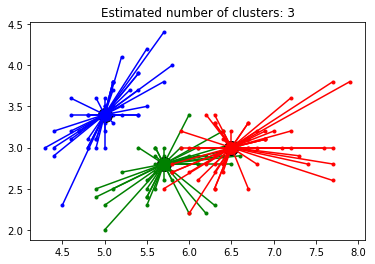

In [599]:
from itertools import cycle

plt.close('all')
plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    class_members = labels == k
    cluster_center = X[cluster_centers_indices[k]]
    plt.plot(X[class_members, 0], X[class_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
    for x in X[class_members]:
        plt.plot([cluster_center[0], x[0]], [cluster_center[1], x[1]], col)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [600]:
output.loc['Affinity Propogation','ARI'] = metrics.adjusted_rand_score(iris.target, clustering.labels_)
output.loc['Affinity Propogation','MI'] = metrics.adjusted_mutual_info_score(iris.target, clustering.labels_)
output.loc['Affinity Propogation','HCV'] = metrics.homogeneity_score(iris.target, clustering.labels_)
output.loc['Affinity Propogation','FM'] = metrics.fowlkes_mallows_score(iris.target, clustering.labels_)
output.loc['Affinity Propogation','SC'] = metrics.silhouette_score(iris.data, clustering.labels_, metric='euclidean')
output.loc['Affinity Propogation','CH'] = metrics.calinski_harabaz_score(iris.data, clustering.labels_)
output.loc['Affinity Propogation','DB'] = metrics.davies_bouldin_score(iris.data, clustering.labels_)

# Mean Shift Clustering

In [601]:
from sklearn.cluster import MeanShift
from sklearn.preprocessing import StandardScaler
x = pd.DataFrame(iris.data, columns=['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width'])
y = pd.DataFrame(iris.target, columns=['Target'])

ms = MeanShift()

In [602]:
ms.fit(iris.data)

MeanShift(bandwidth=None, bin_seeding=False, cluster_all=True, min_bin_freq=1,
     n_jobs=None, seeds=None)

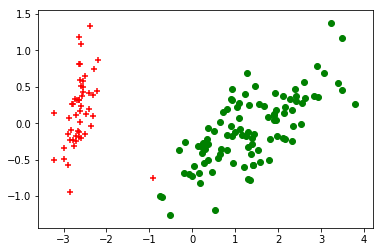

In [603]:
import pylab as pl
from sklearn.decomposition import PCA
pca = PCA(n_components=2).fit(iris.data)
pca_2d = pca.transform(iris.data)

pl.figure('Mean Shift Algorithm')

for i in range(0, pca_2d.shape[0]):
    if ms.labels_[i] == 1:
        c1 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='r', marker='+')
    
    elif ms.labels_[i] == 0:
        c2 = pl.scatter(pca_2d[i,0],pca_2d[i,1],c='g', marker='o')

        

In [604]:
output.loc['Mean Shift','ARI'] = metrics.adjusted_rand_score(iris.target, ms.labels_)
output.loc['Mean Shift','MI'] = metrics.adjusted_mutual_info_score(iris.target, ms.labels_)
output.loc['Mean Shift','HCV'] = metrics.homogeneity_score(iris.target, ms.labels_)
output.loc['Mean Shift','FM'] = metrics.fowlkes_mallows_score(iris.target, ms.labels_)
output.loc['Mean Shift','SC'] = metrics.silhouette_score(iris.data, ms.labels_, metric='euclidean')
output.loc['Mean Shift','CH'] = metrics.calinski_harabaz_score(iris.data, ms.labels_)
output.loc['Mean Shift','DB'] = metrics.davies_bouldin_score(iris.data, ms.labels_)

## Store the comparitve result

In [605]:
output.to_pickle('./result/result.pkl')